In [15]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

(15000, 2)
[[-0.01591059 -1.09333956]
 [ 1.06026411 -1.62883508]
 [ 0.33016551 -2.09644198]
 ..., 
 [ 2.29233694  7.90334606]
 [ 2.38145685  7.37888718]
 [ 0.81026739  6.1810112 ]]
(15000,)
[ 0.  0.  0. ...,  2.  2.  2.]


/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: covariance is not positive-semidefinite.
  


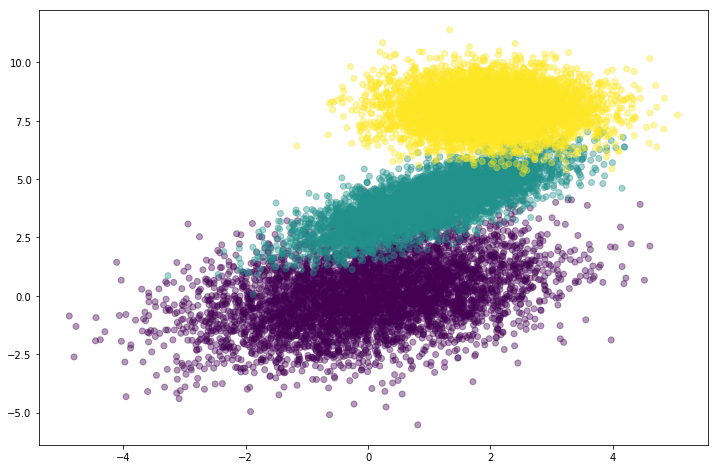

In [2]:
np.random.seed(12)
num_observations = 5000

x1 = np.random.multivariate_normal([0, 0], [[2, .75],[.75, 2]], num_observations)
x2 = np.random.multivariate_normal([1, 4], [[1, .75],[.75, 1]], num_observations)
x3 = np.random.multivariate_normal([2, 8], [[0, .75],[.75, 0]], num_observations)

simulated_separableish_features = np.vstack((x1, x2, x3)).astype(np.float32)
print (simulated_separableish_features.shape)
print (simulated_separableish_features)
simulated_labels = np.hstack((np.zeros(num_observations),
                                np.ones(num_observations), np.ones(num_observations) + 1))
print (simulated_labels.shape)
print (simulated_labels)

plt.figure(figsize=(12,8))
plt.scatter(simulated_separableish_features[:, 0], simulated_separableish_features[:, 1],
            c = simulated_labels, alpha = .4)

In [4]:
# Reformat the input labels to one-hot encoded vector
labels_onehot = np.zeros((simulated_labels.shape[0], 3)).astype(int)
labels_onehot[np.arange(len(simulated_labels)), simulated_labels.astype(int)] = 1

train_dataset, test_dataset, \
train_labels, test_labels = train_test_split(
    simulated_separableish_features, labels_onehot, test_size = .1, random_state = 12)
print (train_dataset.shape)
print (train_dataset)
print (test_dataset.shape)
print (test_dataset)
print (train_labels.shape)
print (train_labels)
print (test_labels.shape)
print (test_labels)


(13500, 2)
[[ 1.23780024  7.30111933]
 [-0.34708297  2.12157679]
 [-0.16103078  2.45040798]
 ..., 
 [ 0.83801585  3.72574663]
 [ 0.34574279  1.62263095]
 [ 2.76097226  9.37349892]]
(1500, 2)
[[ 1.50782776 -0.1503651 ]
 [ 1.05072832  6.35790443]
 [ 0.16165243  0.99401277]
 ..., 
 [ 0.55349004  0.71022296]
 [ 1.56232834 -0.51168972]
 [ 0.97284937  3.77959847]]
(13500, 3)
[[0 0 1]
 [1 0 0]
 [0 1 0]
 ..., 
 [0 1 0]
 [0 1 0]
 [0 0 1]]
(1500, 3)
[[1 0 0]
 [0 0 1]
 [1 0 0]
 ..., 
 [1 0 0]
 [1 0 0]
 [0 1 0]]


In [16]:
# in this case; num_features = num_statements
# num_input = num_test_cases
dataset = np.matrix([
    [1,1,1,1,0,1,0,0,1],
    [1,0,0,0,1,1,1,1,0],
    [0,0,0,0,0,1,1,0,0],
    [1,1,0,0,1,0,1,1,1],
    [1,1,1,0,1,1,1,1,1],
    [0,0,1,0,0,1,1,1,0],
    [1,1,1,1,0,1,0,1,1]
]).astype(int)
# in labels, 0 means success, 1 means failure
#labels = np.array([[0],[0],[0],[0],[0],[1],[1]])
labels = np.array([0,0,0,0,0,1,1])
# transform the labels to one-hot format
labels_onehot = np.zeros((labels.shape[0], 2)).astype(int)
labels_onehot[np.arange(len(labels)), labels.astype(int)] = 1
# divide the dataset into train and test datasets
train_dataset, test_dataset, \
train_labels, test_labels = train_test_split(
    dataset, labels, test_size = .1, random_state = 12)
print (train_labels)
print (train_dataset)

[1 0 0 0 1 0]
[[0 0 1 0 0 1 1 1 0]
 [1 1 1 1 0 1 0 0 1]
 [0 0 0 0 0 1 1 0 0]
 [1 0 0 0 1 1 1 1 0]
 [1 1 1 1 0 1 0 1 1]
 [1 1 0 0 1 0 1 1 1]]


In [22]:
# Build_model
hidden_nodes = 5
hidden_layers = 5
# num_labels is 1, only true/false classification
num_labels = 1
batch_size = 100
# num_features is num_statements in this case
num_features = train_dataset.shape[1]
learning_rate = .01
parameters = {} # parameters for hidden layers

graph = tf.Graph()
with graph.as_default():
    
    # Data
    tf_train_dataset = tf.placeholder(tf.float32, shape = [None, num_features])
    tf_train_labels = tf.placeholder(tf.float32, None)
    tf_test_dataset = tf.constant(test_dataset, dtype=tf.float32)
  
    # Weights and Biases
    layer1_weights = tf.Variable(tf.truncated_normal([num_features, hidden_nodes]))
    layer1_biases = tf.Variable(tf.zeros([hidden_nodes]))
    
    for l in range(1, hidden_layers+1):
        parameters['W' + str(l)] = tf.Variable(tf.truncated_normal([hidden_nodes, hidden_nodes]))
        parameters['b' + str(l)] = tf.Variable(tf.zeros([hidden_nodes]))
    
    layer2_weights = tf.Variable(tf.truncated_normal([hidden_nodes, num_labels]))
    layer2_biases = tf.Variable(tf.zeros([num_labels]))
    
    # Three-Layer Network
#     def three_layer_network(data):
#         input_layer = tf.matmul(data, layer1_weights)
#         hidden = input_layer + layer1_biases
#         output_layer = tf.nn.sigmoid(tf.matmul(hidden, layer2_weights) + layer2_biases)
#         return output_layer
    output = {}
    def three_layer_network(data):
        # input_layer = tf.matmul(data, layer1_weights)
        output['o' + str(0)] = tf.matmul(data, layer1_weights)+layer1_biases
        for l in range(1, hidden_layers+1):
            output['o' + str(l)] = tf.nn.relu(tf.matmul(output['o' + str(l-1)], parameters['W' + str(l)] ) + parameters['b' + str(l)]) 
        #hidden = tf.nn.relu(input_layer + layer1_biases)
        #output_layer = tf.matmul(hidden, layer2_weights) + layer2_biases
        output_layer = tf.nn.sigmoid(tf.matmul(output['o'+str(hidden_layers)], layer2_weights) + layer2_biases)
        #output_layer = tf.nn.relu(output['o'+str(hidden_layers-1)])
        return output_layer
    
    # Model Scores
    model_scores = three_layer_network(tf_train_dataset)
    model_scores_t = tf.reshape(model_scores,[-1])
    
    # Loss
    # cross_entropy = tf.reduce_sum(- tf_train_labels * tf.log(model_scores_t))
    cross_entropy = tf.reduce_sum(tf.square(tf_train_labels - model_scores_t))
    loss = tf.reduce_mean(cross_entropy)
    #loss = tf.nn.softmax_cross_entropy_with_logits(logits=model_scores_t, labels=tf_train_labels)
  
    # Optimizer
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
    
    # Predictions
    #train_prediction = tf.nn.sigmoid(model_scores)
    train_prediction = model_scores
    #test_prediction = tf.nn.sigmoid(three_layer_network(tf_test_dataset))
    test_prediction = tf.reshape(three_layer_network(tf_test_dataset),[-1])

In [18]:
# PART B
# estimate the suspiciousness of each statement
test_susp_dataset = np.identity(dataset.shape[1])
print (test_susp_dataset)
print (test_susp_dataset.shape)

[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.]]
(9, 9)


In [19]:
def accuracy(predictions, labels):
    preds_correct_boolean =  np.argmax(predictions, 1) == np.argmax(labels, 1)
    correct_predictions = np.sum(preds_correct_boolean)
    accuracy = 100.0 * correct_predictions / predictions.shape[0]
    return accuracy

In [23]:
num_steps = 10001

with tf.Session(graph=graph) as session:
    tf.initialize_all_variables().run()
    for step in range(num_steps):
        offset = (step * batch_size) % (train_labels.shape[0] - batch_size)
        minibatch_data = train_dataset[offset:(offset + batch_size), :]
        minibatch_labels = train_labels[offset:(offset + batch_size)]
        feed_dict = {tf_train_dataset : minibatch_data, tf_train_labels : minibatch_labels}
        #session.run(tf.global_variables_initializer())
        
        _, l, predictions = session.run(
            [optimizer, loss, model_scores_t], feed_dict = feed_dict
            )
        
        if step % 1000 == 0:
            # print (session.run(train_prediction))
            print 'Minibatch loss at step {0}: {1} - {2}'.format(step, l, predictions)

    print test_prediction.eval()
    print test_labels
    # print 'Test accuracy: {0}%'.format(accuracy(test_prediction.eval(), test_labels))
    for count in range(dataset.shape[1]):
        print (count)
        print (test_susp_dataset[count,:].reshape(1,dataset.shape[1]))
        feed_dict = {tf_test_dataset: test_susp_dataset[count,:].reshape(1,dataset.shape[1])}
        predictions = session.run([test_prediction], feed_dict)
        print (predictions)

Minibatch loss at step 0: 3.98921084404 - [ 1.          0.99472946  0.99999893  1.          1.          0.99986315]
Minibatch loss at step 1000: 0.00218697357923 - [  1.00000000e+00   3.25873494e-02   7.91318156e-03   6.96043891e-04
   1.00000000e+00   3.25873494e-02]
Minibatch loss at step 2000: 0.000707714236341 - [  1.00000000e+00   1.86002720e-02   3.96249397e-03   2.69416982e-04
   1.00000000e+00   1.86002720e-02]
Minibatch loss at step 3000: 0.000387753476389 - [  1.00000000e+00   1.37843071e-02   2.77695013e-03   1.66712067e-04
   1.00000000e+00   1.37843071e-02]
Minibatch loss at step 4000: 0.000257696257904 - [  1.00000000e+00   1.12446034e-02   2.19073403e-03   1.21387951e-04
   1.00000000e+00   1.12446034e-02]
Minibatch loss at step 5000: 0.00018934434047 - [  1.00000000e+00   9.64278262e-03   1.83538545e-03   9.59403478e-05
   1.00000000e+00   9.64278262e-03]
Minibatch loss at step 6000: 7.26607759134e-05 - [ 1.          0.00852413]
Minibatch loss at step 7000: 0.0001203468

In [10]:
a = tf.constant([[0.9],[0.4],[0.4]])
anew = tf.constant([0.9,0.4,0.4])
b = tf.constant([[1],[0],[0]])
bnew = tf.constant([1,0,0],dtype=tf.float32)
result =  tf.nn.softmax_cross_entropy_with_logits(logits=a,labels=b,dim=0)[0]
result2 = tf.nn.sigmoid([[1.2],[0.9],[0.4]])
result3 = tf.reduce_sum(-bnew*tf.log(anew))
sess = tf.InteractiveSession()
sess.run(tf.initialize_all_variables())
print result.eval()
print result2.eval()
print result3.eval()

anew = tf.reshape(a,[-1])
print anew.eval()

0.794377
[[ 0.76852483]
 [ 0.71094948]
 [ 0.59868765]]
0.105361
[ 0.89999998  0.40000001  0.40000001]
